In [1]:
import os
import sys
import json
import numpy as np
import matplotlib
matplotlib.use('nbagg')
from matplotlib import style
style.use('ggplot')
import matplotlib.pyplot as plt
from pandeia.engine.perform_calculation import perform_calculation
from pandeia.engine.io_utils import read_json, write_json
from photutils.geometry import circular_overlap_grid, elliptical_overlap_grid, rectangular_overlap_grid
from astropy.io import fits
from copy import deepcopy

In [2]:
import pysynphot as psyn
s = psyn.FileSpectrum("/Users/pickering/STScI/smite/cdbs.23.1.rc3/calspec/bd_33d2642_fos_003.fits")
s.convert('um')
s.convert('mjy')
len(s.wave)

4696

In [4]:
#%%timeit
test_dir = "/Users/pickering/STScI/smite/pandeia_test/tests/engine/jwst/"
#test_dir = "/Users/pickering/STScI/smite/pandeia_test/test_utilities/spider_specs/tmp/jwst/"
#test_file = test_dir + "instrument/nirspec/defaults/fixed_slit/s1600a1_prism_clear_nrsrapid_allslits.jeng"
#test_file = test_dir + "instrument/nirspec/defaults/fixed_slit/s1600a1_g395m_f290lp_nrsrapid_allslits.jeng"
#test_file = test_dir + "instrument/nirspec/defaults/fixed_slit/s1600a1_g140m_f070lp_nrsrapid_s1600a1.jeng"
test_file = test_dir + "instrument/nirspec/defaults/msa/shutter_g395h_f290lp_nrsrapid_full_msafullapphot.jeng"
#test_file = test_dir + "instrument/nirspec/defaults/ifu/ifu_g140m_f070lp_nrsrapid_full_ifunodoffscene.jeng"
#test_file = test_dir + "instrument/nircam/defaults/sw_imaging/sw_f090w_rapid_1024x1024.jeng"
#test_file = test_dir + "instrument/nircam/defaults/sw_imaging/sw_f182m_rapid_full.jeng"
#test_file = test_dir + "instrument/nirspec/defaults/ifu/ifu_g395m_f290lp_nrsrapid_full.jeng"
#test_file = test_dir + "instrument/miri/defaults/mrs/ch4_short_fast_full.jeng"
#test_file = test_dir + "common/strategy/aperture_xy/miri/mrs/0_3__0_3_0.jeng"
#test_file = test_dir + "common/scene/coordinates/extended_source_offset.jeng"
#test_file = test_dir + "common/bkgd/builtin/nircam/f277w_flat.jeng"
#test_file = test_dir + "sed/spectra/brown_ngc_7771.jeng"
#test_file = test_dir + "common/strategy/aperture_xy/nircam/lw_imaging/0_0__0_0.jeng"
#test_file = test_dir + "common/strategy/aperture_xy/niriss/soss/0_3__0_3.jeng"
#test_file = test_dir + "instrument/nirspec/defaults/msa/shutter_prism_clear_nrsrapid_full_msafullapphot.jeng"
#test_file = test_dir + "instrument/miri/defaults/coronagraphy/fqpm1065_f1065c_fast_mask1065.jeng"
#test_file = test_dir + "workbooks/sample/wb_33_1.jeng"
#test_file = test_dir + "instrument/niriss/defaults/wfss/imager_gr150c_f090w_nis_full.jeng"
#test_file = test_dir + "instrument/nircam/defaults/wfgrism/lw_grismr_f300m_rapid_full.jeng"
#test_file = test_dir + "instrument/niriss/defaults/soss/soss_gr700xd_nis_substrip80.jeng"
#test_file = test_dir + "instrument/miri/defaults/lrsslit/lrsslit_p750l_fast_full.jeng"
#test_file = test_dir + "instrument/niriss/defaults/ami/nrm_f277w_nisrapid_full.jeng"
#test_file = test_dir + "instrument/nircam/defaults/coronagraphy/masklwb_f480m_rapid_320x320.jeng"

calc_input = read_json(test_file)

#calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 10.0
offsets = [0.0]
for o in offsets:
    #calc_input['scene'][0]['shape']['geometry'] = 'sersic'
    #calc_input['scene'][0]['shape']['sersic_index'] = 1.0
    #calc_input['scene'][0]['shape']['major'] = 0.3
    #calc_input['scene'][0]['spectrum']['normalization']['norm_flux'] = 100000.0
    #calc_input['configuration']['detector']['nint'] = 1
    #calc_input['scene'][0]['position']['x_offset'] = o
    #calc_input['scene'][0]['position']['y_offset'] = o
    #calc_input['scene'][0]['position']['orientation'] = 45.0
    #calc_input['scene'][0]['spectrum']['normalization'] = {
    #    'norm_flux': 0.01,
    #    'norm_fluxunit': 'mjy',
    #    'norm_wave': 0.7,
    #    'norm_waveunit': 'microns',
    #    'type': 'at_lambda'
    #}
    #calc_input['scene'][0]['spectrum']['sed'] = {
    #    'sed_type': "input",
    #    "spectrum": [s.wave, s.flux]
    #}
    #calc_input['scene'].append(deepcopy(calc_input['scene'][0]))
    #calc_input['scene'][1]['spectrum']['normalization'] = {
    #    'norm_flux': 0.011,
    #   'norm_fluxunit': 'mjy',
    #   'norm_wave': 1.5,
    #    'norm_waveunit': 'microns',
    #    'type': 'at_lambda'
    #}
    #calc_input['scene'][1]['spectrum']['sed'] = {
    #    'sed_type': "input",
    #    "spectrum": [np.linspace(1.2, 1.65, num=10), 0.5*np.ones(10)]
    #}
    #calc_input['scene'][1]['position']['x_offset'] = 1.0
    #calc_input['strategy']['target_xy'] = [o, 0.0]
    #calc_input['strategy']['scene_rotation'] = 0.0
    #s = deepcopy(calc_input['scene'][0])
    #calc_input['scene'].append(s)
    #calc_input['scene'][1]['position']['x_offset'] = -2.5
    #calc_input['strategy']['unocculted_xy'] = [2.0, 2.0]
    #calc_input['strategy']['aperture_size'] = 0.0
    #calc_input['strategy']['sky_annulus'] = [25.4, 0.0]
    #calc_input['strategy']['use_exact'] = 1
    #calc_input['configuration']['instrument']['shutter_location'] = "q3_20_151"
    #calc_input['configuration']['instrument']['slitlet_shape'] = [[0, -2], [0, 0], [0, 2]]
    #calc_input['configuration']['scene_size'] = 4.0
    #calc_input['strategy']['reference_wavelength'] = 5.1
    #calc_input['strategy']['method'] = 'ifunodoffscene'
    #calc_input['strategy']['aperture_size'] = 0.2
    #calc_input['strategy']['background_subtraction'] = False
    #calc_input['strategy']['order'] = 1
    #calc_input['strategy']['dithers'] = [{'x': 0.5, 'y': 0.5}, {'x': -0.5, 'y': -0.5}]
    #calc_input['configuration']['detector']['nint'] = 100
    report = perform_calculation(calc_input, dict_report=False, webapp=True)
    report_dict = report.as_dict()
    report_fits = report.as_fits()
    for w, msg in report_dict['warnings'].items():
        print(w + ": " + msg)
    print(o, report_dict['scalar'])

/Users/pickering/miniconda3/envs/py35/lib/python3.5/site-packages/numpy/core/numeric.py:190: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  a = empty(shape, dtype, order)


0.0 {'contamination': 0.5259934422447095, 'x_offset': 0.0, 'sn': 5.684968254673323, 'extraction_area': 4.3238095238097349, 'disperser': 'g395h', 'extracted_noise': 0.4092122543872337, 'all_dithers_time': 107.36760000000001, 'filter': 'f290lp', 'extracted_flux': 2.3263586756147276, 'background_area': 8.6476190476194699, 'background': 0.17044033456249452, 'on_source_time': 107.36760000000001, 'background_total': 0.024234379750689348, 'background_sky': 0.011487254924958773, 'y_offset': 0.0, 'reference_wavelength': 3.987487788746584, 'aperture_size': 'N/A', 'cr_ramp_rate': 0.008520007140268659}


/Users/pickering/STScI/smite/pandeia/engine/build/lib/pandeia/engine/report.py:122: RuntimeWarning: divide by zero encountered in true_divide
  self.detector_sn = (s - self.bg_pix) / n
/Users/pickering/STScI/smite/pandeia/engine/build/lib/pandeia/engine/report.py:147: RuntimeWarning: divide by zero encountered in true_divide
  sn = extracted['extracted_flux'] / extracted['extracted_noise']


<IPython.core.display.Javascript object>


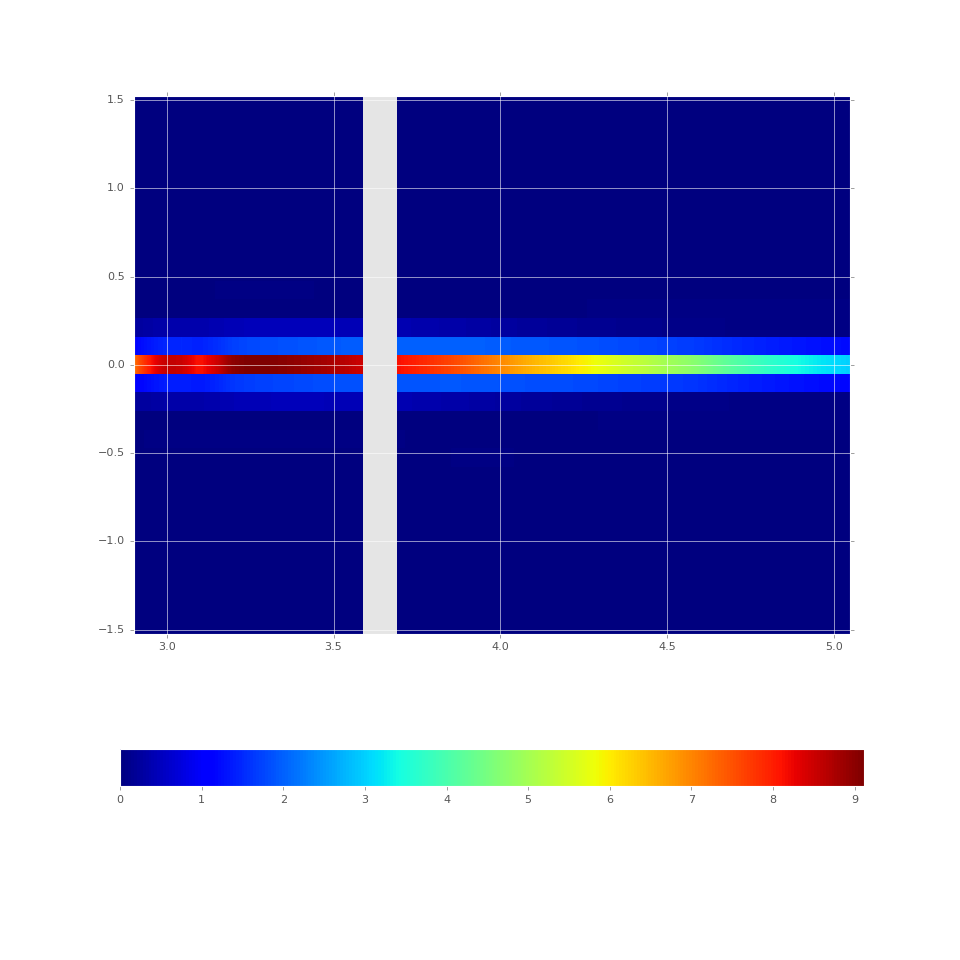

In [5]:
f = plt.figure(figsize=(12, 12))
t = report_dict['transform']
#if report_dict['information']['calc_type'] == 'image' or report_dict['information']['calc_type'] == 'slitless':
if report_dict['information']['calc_type'] in ('image', 'multiorder'):
    xmin = t['x_min'] 
    xmax = t['x_max']
    aspect = 0.5
#elif report_dict['information']['calc_type'] == 'slitless':
#    mid = t['wave_det_size']/2.0
#    xmin = -t['x_step'] * mid
#    xmax = t['x_step'] * mid
#    aspect = 0.75
else:
    xmin = t['wave_det_min']
    xmax = t['wave_det_max']
    aspect = 0.75
# 
#aspect = 1.0
#xmin = t['x_min'] 
#xmax = t['x_max']
ymin = t['y_min']
ymax = t['y_max']
extent = [xmin, xmax, ymin, ymax]
#implot = plt.imshow(report_dict['3d']['flux'][0][:,:,0], interpolation='nearest', extent=extent, aspect=aspect*(xmax-xmin)/(ymax-ymin))
implot = plt.imshow(report_dict['2d']['snr'], interpolation='nearest', extent=extent, aspect=aspect*(xmax-xmin)/(ymax-ymin))
#implot = plt.imshow(report_dict['2d']['snr'], interpolation='nearest', extent=extent)
#implot = plt.imshow(report_dict['2d']['snr_unrotated'], interpolation='nearest', extent=[xmin, xmax, ymin, ymax], aspect=aspect*(ymax-ymin)/(xmax-xmin))
#implot = plt.imshow(report_dict['2d']['snr'], interpolation='nearest')
strategy = calc_input['strategy']
circles = []
#x, y = calc_input['strategy']['target_xy']
#circles.append(plt.Circle((x, y), radius=strategy['aperture_size'], edgecolor='white', facecolor='none'))
#circles.append(plt.Circle((x, y), radius=strategy['sky_annulus'][0], edgecolor='red', facecolor='none'))
#circles.append(plt.Circle((x, y), radius=strategy['sky_annulus'][1], edgecolor='red', facecolor='none'))
#for c in circles:
#    implot.axes.add_artist(c)
plt.colorbar(orientation='horizontal')
#if report_dict['information']['calc_type'] == 'slitless':
#    ax2 = implot.axes.twiny()
#    ax2.set_xlim(t['wave_det_min'], t['wave_det_max'])
#    ax2.grid(b=None)
plt.show()

In [ ]:
plt.figure(figsize=(6, 6))
c = 'target'
plt.plot(report_dict['1d'][c][0], report_dict['1d'][c][1])
plt.show()

In [16]:
report_dict['2d']['snr'][np.isfinite(report_dict['2d']['snr'])].mean()

0.36546657883649597

In [7]:
np.nanmean?

In [ ]:
plt.figure(figsize=(6, 6))
combined = report_dict['2d']['detector']
s = report.signals[0].rate_plus_bg
n = report.noises[0].stdev_pix
target = s + n * np.random.randn(n.shape[0], n.shape[1])
#target = s
#plt.imshow(combined, interpolation='nearest', extent=extent, aspect=aspect*(xmax-xmin)/(ymax-ymin))
plt.imshow(report_dict['3d']['reconstructed_snr'][0], interpolation='nearest')
plt.colorbar(orientation='horizontal')
#report_fits['2d']['snr'].writeto("test.fits")
#plt.plot(report_dict['1d']['sn'][0], report_dict['1d']['sn'][1])
sn = report_dict['1d']['sn'][1]
sn.argmax()
plt.show()

In [ ]:
from astropy.table import Table
spec_file = '/Users/pickering/STScI/galaxy_sed_catalog/IRAS_08572+3915_spec.dat'
t = Table.read(spec_file, format='ascii')
wave = t['col1']/1.0e4
f_lam = t['col2']
c = 299792458.0e2  # cm
x = wave * 1.0e-4 # cm
nu = c/x
fnu = 1.0e26 * x**2 / c * f_lam * 1.0e8 # mJy
fig = plt.figure(figsize=(6, 6))
ax = plt.gca()
ax.set_yscale('log')
plt.plot(wave, fnu)
plt.ylabel(r"F$_\nu$ (mJy)")
plt.xlabel(r"$\lambda$ ($\mu$m)")
len(wave)
plt.savefig("blah.png")
plt.show()

In [ ]:
plt.figure(figsize=(6,6))
plt.plot(report_dict['1d']['sn'][0], report_dict['1d']['sn'][1])
plt.show()

In [ ]:
nzf = np.load("ifunodoffscene.npz")
weight_map = nzf['arr_0']
p = plt.imshow(weight_map, interpolation='nearest')
plt.colorbar(orientation='horizontal')
plt.show()

In [ ]:
wmin = 0.5
wmax = 30.0
sampling = 200
k = -sampling * np.log(wmin)
nw = round(sampling * np.log(wmax) + k) + 1
wave = np.exp((np.arange(nw) - k) / sampling)

In [ ]:
wrange = {'wmin': 1.0, 'wmax': 2.0}
sp1 = [np.linspace(0.9, 1.3, num=5), np.ones(5)]
sp2 = [np.linspace(1.2, 1.6, num=5), 0.5*np.ones(5)]
sp3 = [np.linspace(1.5, 2.1, num=5), 1.15*np.ones(5)]

In [ ]:
plt.plot(sp1[0], sp1[1])
plt.plot(sp2[0], sp2[1])
plt.plot(sp3[0], sp3[1])
plt.show()

In [ ]:
from pandeia.engine.astro_spectrum import merge_wavelengths, spectrum_rebin

In [ ]:
w = merge_wavelengths(sp1[0], sp2[0])
w = merge_wavelengths(w, sp3[0])
w

In [ ]:
new_sp1 = spectrum_rebin(sp1[1], sp1[0], w, mask_val=np.nan)

In [ ]:
plt.plot(sp1[0], sp1[1])
plt.plot(sp2[0], sp2[1])
plt.plot(sp3[0], sp3[1])
plt.plot(w, new_sp1)
plt.show()

In [ ]:
new_sp1

In [ ]:
for i, s in enumerate(new_sp1):
    print(i)

In [ ]:
new_sp1[np.where(new_sp1 == np.nan)]

In [ ]:
new_sp1

In [ ]:
calc_input